# Introduction to Quant Finance

## Module 1.2: Covariance and Correlation

### 1.2.2 Correlation


In the last module, we saw the covariance of two variables, defined as

$cov(X,Y) = E[(X-E[X])(Y-E[Y])]$

Which reduces to the easier-to-compute form as:

$cov(X,Y) = E[XY] - E[X]E[Y]$

The covariance is a useful metric, but has a dimensionality problem.
That is, if we have two random variables $X$ and $Y$, where $X$ is a person's height in cm, and $Y$ is a person's 
weight in kilograms, the resulting covariance has units of $cmkg$, which is not a unit most people have experience and an intuition about. For example, what does a covariance of 5cmkg mean?

To fix this, we can normalise the covariance, and obtain the correlation. This gives a bounded range between -1 and 1, and more represents the degree that two variables move together, independent of the scale of the values.

For instance, let's setup two sets of data:

In [1]:
%run setup.ipy

In [2]:
# Heights, in cm
X = np.array([188.53675454, 184.70654578, 151.09735791, 164.36483092,
       168.26683755, 164.16100367, 192.05069779, 165.76617936,
       168.06909493, 188.90621868, 174.92165251, 153.59884988,
       175.2229729 , 191.1264832 , 173.65462449, 174.29709269,
       174.42391046, 148.76843808, 195.88238234, 177.81542544])

In [3]:
# Weights, in kg
Y = np.array([ 97.16635985,  66.56711927,  78.46545355,  82.73956732,
        50.27365043,  71.2523942 , 110.05660504,  63.83136855,
        54.91020919,  82.22492553,  91.159724  ,  63.59812684,
        53.32374706,  63.87788126,  92.49811908,  57.29296249,
        87.04770013,  46.03189333,  59.9751531 ,  84.22532972])

In [4]:
np.cov(X, Y)[0, 1]  # For the reason we need to sub-index, see the previous module.

87.38932004789447

This covariance is positive, so we know that as X changes, Y changes in the same direction. The value itself is nearly meaningless to us here, and one should be careful to try and interpret it.

Correlation can be computed a couple of different ways, but the most useful (and most common) for us here is to derive it from the covariance. 

As the covariance is:

$cov(X,Y) = E[(X-E[X])(Y-E[Y])]$

The correlation is a normalisation of this value:

$corr(X,Y) = \frac{cov(X, Y)}{\sigma_X \sigma_Y}$

Which is:

$corr(X, Y) = \frac{E[(X-E[X])(Y-E[Y])]}{\sigma_X \sigma_Y}$

As both $\sigma_X$ and $\sigma_Y$ have the same dimension as the original $X$ and $Y$, the value $\sigma_X \sigma_Y$ has the same dimension as the covariance. In our previous example, the standard deviation of $X$ is about 29.3cm and the standard deviation of $Y$ is about 58.65kg, so the value $\sigma_X \sigma_Y$ is approximately 1720 cmkg. This unit cancels out the unit of the covariance term (the numerator in the fraction), giving a dimensionless value.

#### Exercises

For each of the next three questions, work out the answer using three techniques:

* Intuitively guess the answer
* Write some code to estimate the answer (for instance, create a random variable `X = np.random.randn...`)
* Solve mathematically 

Find the following three values:

1. What is the correlation of a variable with itself?
2. What is the correlation of the negation of a variable with itself?
3. What is the correlation of a randomly-chosen variable with another randomly-chosen variable?

### What the correlation tells us

The correlation is a measure, similar to the covariance, except that it is easier to intuitively grasp. A correlation of 1 is a perfect correlation - $X$ increases exactly as $Y$ increases. Here is an example:

In [5]:
X = np.random.random(10)  # 10 random values
Y1 = X + 2
np.corrcoef(X, Y1)[0, 1]

1.0

Here, even those $X$ and $Y1$ have different scales, they "move together" perfectly. A correlation of -1 is the minimum, and represents a pefect negation:

In [6]:
Y2 = -X * 5

In [7]:
np.corrcoef(X, Y2)[0, 1]

-1.0

Again, different scales, but the correlation simply tells us about how they move together. To get a visual sense of this, let's graph those values:

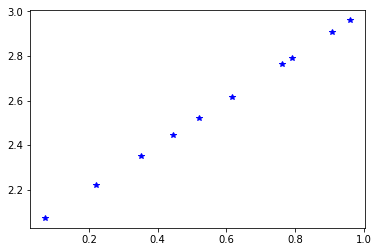

In [8]:
plt.plot(X, Y1, "*", color='blue')

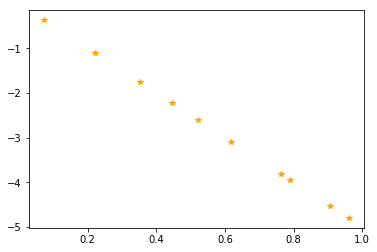

In [9]:
plt.plot(X, Y2, "*", color='orange')

### Correlation does not imply causation

Any discussion about correlation must include the above disclaimer. If two variables $X$ and $Y$ have a strong (or even perfect) correlation, this does not imply that $X$ causes $Y$. To see this simply, note that there is no "order" in the equation, and:

$corr(X, Y) = \frac{E[(X-E[X])(Y-E[Y])]}{\sigma_X \sigma_Y}$

this is equal to:

$corr(Y, X) = \frac{E[(Y-E[Y])(X-E[X])]}{\sigma_Y \sigma_X}$

At the very least, even *if* there is a causation between $X$ and $Y$ (and we still haven't shown that), we do not know whether $X$ causes $Y$, or if $Y$ causes $X$!


There are two main reasons why you get a strong correlation, without having a causation either way.

1. There is an underlying factor, let's call it $Z$, that causes both $X$ and $Y$. This may be true even if we do not know, or can't directly measure the values of $Z$. Then $Z$ causes $X$ and $Z$ causes $Y$, and therefore both $X$ and $Y$ "move together".
2. You simply get "unlucky" and the two values *just happen* to have a high correlation, even though they aren't related.

Let's have a look at both of these in more detail.

### Underlying factors

There may be an underlying factor that causes both $X$ and $Y$. A common example here is the following two variables that have a high correlation:

1. Ice cream sales
2. Deaths by drowning

Measuring these two variables indicates a high correlation, so what is going on here? Selling more ice cream does not cause drownings, nor does people drowning sell more ice creams (one would hope). Instead, there is an underlying factor - the weather. If it is hot, ice creams sell more, and people go swimming more, leading to more drownings.

In time series data, this is particularly troublesome. For instance, due to inflation, *most things increase in price over time*. Therefore, if you plot the price of two commodities over time, you are likely to get a positive correlation, even if there is no causation between them! More abstractly, if you plot two S&P 500 companies, you are plotting two *successful* companies, and therefore they would correlate strongly simply because they must have been *somewhat successful* to be a top 500 company. This is a form of "survival bias".

For example, here is the correlation between gold and wheat prices:

In [10]:
import quandl
gold_price = quandl.get("LBMA/GOLD")['USD (AM)']

In [11]:
gold_price.head()

Date
1968-01-02    35.18
1968-01-03    35.16
1968-01-04    35.14
1968-01-05    35.14
1968-01-08    35.14
Name: USD (AM), dtype: float64

In [12]:
wheat_futures = quandl.get("CHRIS/MGEX_IH1")['Last']

In [13]:
wheat_futures.head()

Date
2005-01-03    321.00
2005-01-04    318.00
2005-01-05    319.25
2005-01-06    328.00
2005-01-07    329.50
Name: Last, dtype: float64

In [14]:
prices = pd.DataFrame({"gold": gold_price, "wheat": wheat_futures})
prices.dropna(inplace=True)  # Drop rows where we don't have both gold and wheat
prices.head()

,gold,wheat
Date,,
2005-01-04,426.80,318.00
2005-01-05,425.50,319.25
2005-01-06,425.80,328.00
2005-01-07,423.15,329.50
2005-01-10,421.25,327.50


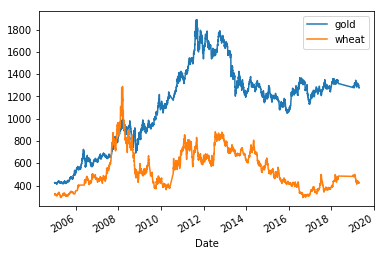

In [15]:
prices.plot()

In [16]:
prices.corr()

,gold,wheat
gold,1.000000,0.404807
wheat,0.404807,1.000000


Here, the correlation between wheat and gold is a positive correlation. However, there is no impactful causation here - the price of gold would not directly affect the price of wheat. Gold is more reliant on economic factors, such as an unstable market may drive people to buy gold as a safer investment. Wheat is more reliant on factors like weather, which determine supply. To oversimplify, good weather causes more supply, leading to reduced prices.

There *are* underlying factors that affect both. Financial markets do affect both prices, as does other factors like international instability. However, the main factor is simply inflation.

We will cover, in great detail, how to determine correlation in time series. The short and simple version, however, is simply to *detrend* the data. In other words, look for the underlying trend and remove it from the data. Then compute the correlation between the detrended data.

A simple detrending concept is to fit a linear model (i.e. $y= ax + b$) and then subtract the model's predicted value from the actual value. This leaves over the residue, or error, of the model, and we compute the correlation of those. A strong correlation in that cause is much more significant (although, still not a causation).

#### Exercise

Remove the trend from the wheat and gold data above, and compute the correlation of the detrended data.

A good function to use is `scipy.signal.detrend`, although if you have a preferred means of computing a linear model from data (for instance, using statsmodels), feel free to use that.

*For solutions, see `solutions/detrending.py`*

### Random correlation

While generally unlikely in a single experiment, two variables may be correlated for no reason other than *random chance*. This is less likely with larger datasets.

However, one factor that *increases* the chance of getting a randomly high correlation is the large number of experiments that we run on a daily instance. Consider a machine learning algorithm that compares dozens of lag periods across thousands of stocks. *At least some* of these will have high correlations that are meaningless and produce to actionable outcome.

To show this in action, here is a simple experiment, performed once. We create two random sets of data, and compute the correlation. If it is able 0.8, we say we "found a high correlation". It is unlikely that the following cell actually does so. Most of the time (for a very high value of "most") you will get a correlation close to zero.

In [ ]:
n_datapoints = 20
x_random = np.random.random(n_datapoints)
y_random = np.random.random(n_datapoints)

corr = np.corrcoef(x_random, y_random)[0, 1]

print("Correlation is:", corr)
if corr > 0.8:
    print("Found a high correlation")
else:
    print("Did not find a high correlation")

In practice, we never run just one experiment, and a new factor to consider in running experiments with computers is the appeal of being able to run *millions* of experiments:

In [20]:
def run_experiment(n_datapoints=20):
    # Note that all data here is randomly chosen
    x_random = np.random.random(n_datapoints)
    y_random = np.random.random(n_datapoints)
    corr = np.corrcoef(x_random, y_random)[0,1]
    return corr > 0.8

In [21]:
n_experiments = 1000000

for i in range(n_experiments):
    if run_experiment():
        print("Found a correlation on experiment {}!".format(i))
print("Finished running experiments")

Found a correlation on experiment 104076!
Found a correlation on experiment 177871!
Found a correlation on experiment 241894!
Found a correlation on experiment 265162!
Found a correlation on experiment 292368!
Found a correlation on experiment 512111!
Found a correlation on experiment 572175!
Found a correlation on experiment 604894!
Found a correlation on experiment 657375!
Found a correlation on experiment 657805!
Found a correlation on experiment 663264!
Found a correlation on experiment 663495!
Found a correlation on experiment 675341!
Found a correlation on experiment 712526!
Found a correlation on experiment 754961!
Found a correlation on experiment 811390!
Found a correlation on experiment 874740!
Found a correlation on experiment 881295!
Found a correlation on experiment 964357!
Found a correlation on experiment 990533!
Found a correlation on experiment 993707!
Finished running experiments


#### Exercises

There are two factors that affect how many of these *false positive* results we get - in other words, correlations that just happen to be high by chance. The two factors are:

1) How much data you have
2) The level at which a correlation is considered "high", i.e. the 0.8 in the above code.

Plot the relationship between these two factors, and the percentage of false positives in running your experiments. Note you might need a log scale on one or both of your axis to properly visualise the results.

Use `np.logspace` to produce a log scale for the number of datapoints.

Write a snippet of code that generates a graph showing the relationship between how many data points you have, and the percentage of false positives (FP) you get. Generate another graph showing the relationship between the "high" correlation level and the FP rate.

**Hint - writing better code**

To make your code more managable and easier to read, encapsulate your behaviour into functions. In other words, take your code, and write small functions that do that one thing. Have the function accept different parameters that you can pass. As an example, if we wanted to run two sets of experiments of different sizes, we can do this:

```
for i in range(1000000):
    run_experiment()
    
for j in range(1000):
    run_experiment()

```

or, you can parameterise the number of experiments and pass that as a function:

```
def run_many_experiments(n_experiments):
    for i in range(n_experiments):
        run_experiment()
        
run_many_experiments(10000000)
run_many_experiments(1000)
```

The second case results in less duplicated code (duplicate code can cause bugs), and is easier to manage. You take the complexity of "running multiple experiments", and hide/encapsulate that into the function `run_many_experiments`. This hides the complexity for later users of your code.

**Hint** This code, may take a while to compute when completed. You can estimate this by using the following profiling code to test how long *one* iteration takes, and then use that to estimate how long the full process will take.

*For solutions, see `solutions/false_positives.py`*